In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class LinearModel(object):
    """Base class for linear models."""

    def __init__(self, eps=1e-5,
                 theta=None):
        """
        Args:
            eps: Threshold for determining convergence.
            theta: Initial guess for theta. If None, use your own default vector.
        """
        self.theta = theta
        self.eps = eps
        
def add_intercept(x):
    """Add intercept to matrix x.

    Args:
        x: a matrix.

    Returns:
        New matrix same as x with 1's in the 0th column.
    """
    new_x = np.empty((x.shape[0], x.shape[1] + 1), dtype=x.dtype)
    new_x[:, 0] = 1
    new_x[:, 1:] = x

    return new_x


def load_dataset(csv_path, label_col='y', add_intercept=False):
    """Load dataset from a CSV file.

    Args:
         csv_path: Path to CSV file containing dataset.
         label_col: Name of column to use as labels (should be 'y' or 'l').
         add_intercept: Add an intercept entry to x-values.

    Returns:
        xs: Numpy array of x-values (inputs).
        ys: Numpy array of y-values (labels).
    """

    def add_intercept_fn(x):
        global add_intercept
        return add_intercept(x)

    # Validate label_col argument
    allowed_label_cols = ('y', 't')
    if label_col not in allowed_label_cols:
        raise ValueError('Invalid label_col: {} (expected {})'
                         .format(label_col, allowed_label_cols))

    # Load headers
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    # Load features and labels
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
    l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
    inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
    labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)

    if inputs.ndim == 1:
        inputs = np.expand_dims(inputs, -1)

    if add_intercept:
        inputs = add_intercept_fn(inputs)
    return inputs, labels

In [3]:
ds1_train_set_path = "C:/Users/acer/Desktop/Data_Structures_And_Algorithms/ds1_train.csv"
ds1_valid_set_path = "C:/Users/acer/Desktop/Data_Structures_And_Algorithms/ds1_valid.csv"

In [4]:
x_train, y_train = load_dataset(ds1_train_set_path, add_intercept=True)
x_valid, y_valid = load_dataset(ds1_valid_set_path, add_intercept=True)

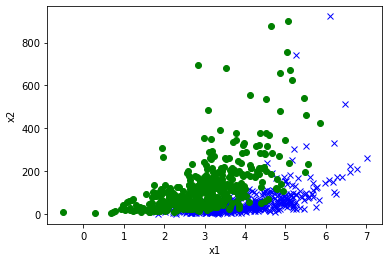

In [5]:
plt.xlabel('x1');
plt.ylabel('x2');

plt.plot(x_train[(y_train == 1), -2], x_train[(y_train == 1), -1], 'bx', linewidth=2);
plt.plot(x_train[(y_train == 0), -2], x_train[(y_train == 0), -1], 'go', linewidth=2);

In [6]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > log_reg = LogisticRegression()
        > log_reg.fit(x_train, y_train)
        > log_reg.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        :param x: Training example inputs. Shape (m, n).
        :param y: Training example labels. Shape (m,).
        """

        def h(theta, x):
            """Vectorized implementation of h_theta(x) = 1 / (1 + exp(-theta^T x)).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :return:      The hypothesis for all training examples. Shape (m,).
            """
            return 1 / (1 + np.exp(-np.dot(x, theta)))

        def gradient(theta, x, y):
            """Vectorized implementation of the gradient of J(theta).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :param y:     All labels of shape (m,).
            :return:      The gradient of shape (n,).
            """
            m, _ = x.shape
            return -1 / m * np.dot(x.T, y - h(theta, x))

        def hessian(theta, x):
            """Vectorized implementation of the Hessian of J(theta).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :return:      The Hessian of shape (n, n).
            """
            m, _ = x.shape
            print(h(theta, x))
            h_theta_x = np.reshape(h(theta, x), (-1, 1))
            print(h_theta_x)
            return 1 / m * np.dot(x.T, h_theta_x * (1 - h_theta_x) * x)
            

        def next_theta(theta, x, y):
            """The next theta updated by Newton's Method.

            :param theta: Shape (n,).
            :return:      The updated theta of shape (n,).
            """
            return theta - np.dot(np.linalg.inv(hessian(theta, x)), gradient(theta, x, y))

        m, n = x.shape
        
        # Initialize theta
        if self.theta is None:
            self.theta = np.zeros(n)

        # Update theta using Newton's Method
        old_theta = self.theta
        new_theta = next_theta(self.theta, x, y)
        while np.linalg.norm(new_theta - old_theta, 1) >= self.eps:
            old_theta = new_theta
            new_theta = next_theta(old_theta, x, y)

        self.theta = new_theta


    def predict(self, x):
        """Make a prediction given new inputs x.

        :param x: Inputs of shape (m, n).
        :return:  Outputs of shape (m,).
        """

        return x @ self.theta >= 0

In [7]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

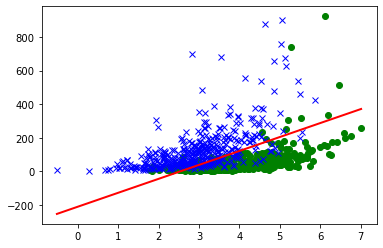

In [8]:
plt.plot(x_train[(y_train == 1), -2], x_train[(y_train == 1), -1], 'go', linewidth = 2)
plt.plot(x_train[(y_train == 0), -2], x_train[(y_train == 0), -1], 'bx', linewidth = 2)
plt.plot()

x1 = np.arange(min(x_train[:, -2]), max(x_train[:, -2]), 0.01)
x2 = -(log_reg.theta[0] / log_reg.theta[2] * 1 + log_reg.theta[1] / log_reg.theta[2] * x1)
plt.plot(x1, x2, c='red', linewidth=2)

In [9]:
print("Theta is: ", log_reg.theta)
print("The accuracy on training set is: ", np.mean(log_reg.predict(x_train) == y_train))

Theta is:  [-6.26018491  2.47707251 -0.0299125 ]
The accuracy on training set is:  0.8825


In [10]:
print("Theta is: ", log_reg.theta)
print("The accuracy on Training set is: ", np.mean(log_reg.predict(x_train) == y_train))

Theta is:  [-6.26018491  2.47707251 -0.0299125 ]
The accuracy on Training set is:  0.8825


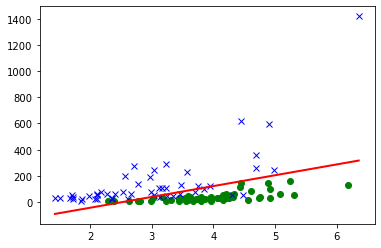

In [11]:
plt.plot(x_valid[(y_valid == 1), -2], x_valid[(y_valid == 1), -1], 'go', linewidth = 2)
plt.plot(x_valid[(y_valid == 0), -2], x_valid[(y_valid == 0), -1], 'bx', linewidth = 2)
plt.plot()

x1 = np.arange(min(x_valid[:, -2]), max(x_valid[:, -2]), 0.01)
x2 = -(log_reg.theta[0] / log_reg.theta[2] * 1 + log_reg.theta[1] / log_reg.theta[2] * x1)
plt.plot(x1, x2, c='red', linewidth=2)

In [12]:
print("The accuracy on Validating set is: ", np.mean(log_reg.predict(x_valid) == y_valid))

The accuracy on Validating set is:  0.9
